<div style="text-align: center; margin: 50px">

<h1 style="color: white; background-color: grey; text-align: center;">Week 11 - Quantum Key distribution</h1>
<h3>Lab notebook</h3>

</div>

In [ ]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, execute, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit_textbook.tools import array_to_latex

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

from random import getrandbits

## Coding cheat sheet:

#Defining a quantum circuit: 

`qc = QuantumCircuit(1)` #Define a 1 qubit quantum circuit <br>

`qc.x(0)` #Add an X gate <br>
`qc.h(0)` #Add an H gate <br>
`qc.z(0)` #Add a Z gate <br>
`qc.y(0)` #Add a Y gate <br>

`qc.draw()` #Draw the circuit <br>

**Using the statevector simulator** (Do this no matter which way you want to see the output):<br>

`svsim = Aer.get_backend('statevector_simulator')` # Tell it which simulator you want to use <br>
`job = execute(qc,svsim)` # Put in the name of your quantum circuit where it says qc<br>
`result = job.result()` <br>


See the output on the Bloch sphere:<br>
`state = result.get_statevector()` <br>
`plot_bloch_multivector(state)`<br>

See the output in vector form:<br>
`state = result.get_statevector()` <br>
`array_to_latex(state, pretext="\\text{Statevector} = ")` <br>

See the output in histogram form: <br>
`counts = result.get_counts(qc)` <br>
`plot_histogram(counts)` <br>

**Using the qasm simulator:**

`qc.measure_all()` #adds measurements <br>

`svsim = Aer.get_backend('qasm_simulator')` # Change statevector to qasm <br>
`job = execute(qc,svsim,shots=100)` # add shots - tell it how many times to run <br>
`result = job.result()` <br>


**Using a real quantum computer:**

Find the least busy backend: <br>
`IBMQ.load_account()` <br>
`provider = IBMQ.get_provider(hub='ibm-q')` <br>
`backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))` <br>
`print("least busy backend: ", backend)` <br>


Run the job:
`job = execute(qc, backend=backend, shots=100)`

`result = job.result()` <br>
`counts = result.get_counts(qc)` <br>
`plot_histogram(counts)` 





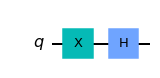

In [ ]:
# Block 1 - Coding Challenge: Alice wants to write code that would create the right qubit for ANY combination of bit and basis. 
# Can you help Alice by completing this code? The block gives you a test bit and basis to work with. 
# You can also test your code with different combinations of bit and basis.

bit = 1 #Test case - the bit Alice wants to encode is 1. After you have completed this code, test it with different combinations of bit and basis
basis = 'X' # Test case - the basis Alice wants to encode in is X
qc = QuantumCircuit(1) # Create a quantum circuit to encode the qubit
if basis == 'Z':
    if bit == 0:
        pass #WRITE CODE HERE: What gate should Alice add to this circuit if Alice wants to encode 0 in Z basis?
    elif bit == 1: 
        qc.x(0) #WRITE CODE HERE: What gate should Alice add to this circuit if Alice wants to encode 1 in Z basis?
elif basis == 'X':
    if bit == 0:
        qc.h(0) #WRITE CODE HERE: #What gate should Alice add to this circuit if Alice wants to encode 0 in X basis?
    elif bit == 1: 
        qc.x(0)
        qc.h(0) #WRITE CODE HERE: What gates should Alice add to this circuit if Alice wants to encode 1 in X basis?
qc.draw()    


<a id="step1"></a>
# Coding the full QKD protocol

We will be using 500 bits to generate the key.

## Step 1 - Alice randomly chooses bits



In [ ]:
# BLOCK 2 - Generate Alice's bits.

alice_bits = [] #This list will store Alice's bits
    
for i in range(500):   # Generate 500 random bits
    alice_bits.append(str(getrandbits(1))) # The function getrandbits generates 1 random bit
print(alice_bits)

['1', '0', '0', '1', '0', '0', '1', '1', '1', '1', '0', '0', '1', '1', '0', '1', '1', '1', '0', '1', '1', '1', '1', '0', '1', '1', '0', '0', '0', '0', '1', '1', '1', '1', '0', '1', '1', '0', '0', '1', '1', '0', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '0', '0', '1', '1', '0', '1', '0', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0', '1', '1', '0', '0', '1', '1', '1', '1', '0', '0', '1', '0', '1', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '1', '1', '0', '1', '1', '0', '1', '1', '0', '1', '1', '1', '1', '0', '1', '0', '0', '1', '1', '1', '1', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0', '1', '0', '1', '0', '0', '1', '1', '1', '0', '1', '0', '0', '1', '1', '1', '1', '1', '0', '1', '0', '0', '0', '1', '0', '1', '0', '1', '1', '0', '1', '0', '1', '0', '0', '1', '1', '1',

## Step 2 - Alice randomly chooses bases

Can you explain what is happening in this Block? Try adding a print statement at the end of the Block to display Alice's bases


In [ ]:
# BLOCK 3 - Generate Alice's bases.

alice_bases = [] # List to store Alice's bases
for i in range(500):
    base = getrandbits(1)
    if base == 0:
        alice_bases.append("Z")
    else:
        alice_bases.append("X") #WRITE CODE HERE: Write code to append the right string to alice_bases

# WRITE CODE HERE: Add a print statement to display Alice's bases
print(alice_bases)

['Z', 'X', 'X', 'Z', 'Z', 'X', 'X', 'Z', 'X', 'X', 'X', 'Z', 'Z', 'X', 'X', 'Z', 'X', 'Z', 'X', 'Z', 'Z', 'X', 'X', 'X', 'Z', 'Z', 'Z', 'X', 'Z', 'X', 'Z', 'Z', 'X', 'X', 'X', 'Z', 'X', 'X', 'Z', 'X', 'X', 'Z', 'Z', 'Z', 'X', 'Z', 'Z', 'X', 'Z', 'X', 'X', 'X', 'Z', 'X', 'Z', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'Z', 'Z', 'X', 'X', 'X', 'Z', 'X', 'X', 'X', 'X', 'X', 'Z', 'Z', 'Z', 'X', 'Z', 'X', 'X', 'X', 'X', 'X', 'Z', 'X', 'X', 'X', 'X', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'X', 'Z', 'X', 'X', 'Z', 'Z', 'Z', 'Z', 'Z', 'X', 'Z', 'Z', 'Z', 'Z', 'Z', 'X', 'Z', 'X', 'X', 'X', 'Z', 'X', 'X', 'Z', 'Z', 'Z', 'Z', 'Z', 'X', 'Z', 'Z', 'X', 'Z', 'Z', 'Z', 'Z', 'X', 'X', 'X', 'Z', 'Z', 'X', 'X', 'Z', 'Z', 'Z', 'X', 'Z', 'Z', 'Z', 'X', 'Z', 'Z', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'Z', 'Z', 'Z', 'X', 'X', 'X', 'X', 'Z', 'Z', 'Z', 'X', 'X', 'Z', 'Z', 'X', 'Z', 'Z', 'Z', 'X', 'Z', 'X', 'X', 'Z', 'X', 'Z', 'Z', 'X', 'Z', 'X', 'X', 'Z', 'X', 'Z', 'X', 'X', 'X', 'Z', 'Z', 'Z', 'X', 'X', 'X', 'X', 'Z',

<a id="step3"></a>
## Step 3 - Encode the classical bits into qubits


The table below summarizes the qubit states Alice sends, based on the bit of Alice's `alice_bits` the corresponding bit of `selected_bases`:

| Bit in `alice_bits` | Corresponding basis in `alice_bases` | Encoding basis | Qubit state sent |
|:----------------:|:--------------------------:|:--------------------------:|:---------------:|
| 0 | Z | $$|0\rangle,|1\rangle$$ |$$|0\rangle$$ |
| 1 | Z | $$|+\rangle,|-\rangle$$ |$$|1\rangle$$ |
| 0 | X | $$|0\rangle,|1\rangle$$ |$$|+\rangle$$ |
| 1 | X | $$|+\rangle,|-\rangle$$ |$$|-\rangle$$ |

In [ ]:
#BLOCK 4 - Encode Alice's qubits. Remeber that the qubit will be in the |0> state at the start, before any gates are applied.

encoded_qubits = []
for i in range(500):
    qc = QuantumCircuit(1,1)
    if alice_bases[i] == "Z":
        if alice_bits[i] == '0':
            pass # We want nothing to happen here - the qubit is already in the state |0>

        elif alice_bits[i] == '1':
            qc.x(0) # Applying an X gate to change the qubit state to |1>
            
    elif alice_bases[i] == "X":
        if alice_bits[i] == '0':
            qc.h(0) # Applying an H gate to change the qubit state to |+>
        elif alice_bits[i] == '1':
            qc.x(0) # Applying an X and H gate to change the qubit state to |->
            qc.h(0)
            
    encoded_qubits.append(qc) # Adding the qubit with the right state to the list of qubits that Alice will send Bob

# Step 4 - Alice sends qubits to Bob

### There's nothing we need to code here. Alice would send the qubits to Bob (maybe through a fiber optic cable)

## Step 5 - Bob randomly picks the bases he will use to measure Alices's qubits

In [ ]:
#BLOCK 5  - generate Bob's bases

bob_bases = []
# WRITE CODE HERE: Copy code from Block 3 to create the list of Bob's bases
for i in range(500):
    base = getrandbits(1)
    if base == 0:
        bob_bases.append("Z")
    else:
        bob_bases.append("X") 
# WRITE CODE HERE: Add a print statement to see Bob's bases
print(bob_bases)

['Z', 'X', 'X', 'Z', 'Z', 'X', 'X', 'X', 'Z', 'Z', 'X', 'X', 'Z', 'Z', 'X', 'X', 'X', 'X', 'X', 'X', 'Z', 'X', 'Z', 'Z', 'X', 'Z', 'Z', 'X', 'Z', 'Z', 'Z', 'X', 'X', 'Z', 'Z', 'Z', 'X', 'Z', 'Z', 'X', 'X', 'Z', 'Z', 'Z', 'X', 'Z', 'X', 'Z', 'Z', 'Z', 'X', 'Z', 'X', 'Z', 'Z', 'X', 'X', 'Z', 'X', 'X', 'Z', 'X', 'Z', 'X', 'X', 'Z', 'X', 'Z', 'Z', 'X', 'X', 'X', 'X', 'Z', 'X', 'X', 'Z', 'X', 'Z', 'X', 'Z', 'X', 'Z', 'X', 'X', 'Z', 'Z', 'X', 'Z', 'X', 'X', 'X', 'Z', 'Z', 'X', 'Z', 'Z', 'X', 'X', 'X', 'X', 'X', 'Z', 'Z', 'Z', 'X', 'Z', 'X', 'Z', 'X', 'X', 'Z', 'X', 'X', 'X', 'Z', 'X', 'Z', 'Z', 'X', 'X', 'X', 'X', 'X', 'Z', 'X', 'Z', 'X', 'Z', 'Z', 'Z', 'X', 'X', 'Z', 'Z', 'X', 'Z', 'Z', 'X', 'X', 'X', 'X', 'X', 'X', 'Z', 'X', 'Z', 'Z', 'X', 'Z', 'X', 'Z', 'X', 'X', 'X', 'X', 'Z', 'X', 'X', 'X', 'X', 'Z', 'X', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'X', 'X', 'X', 'X', 'Z', 'X', 'Z', 'Z', 'X', 'Z', 'X', 'X', 'X', 'Z', 'X', 'X', 'Z', 'X', 'X', 'Z', 'X', 'X', 'X', 'X', 'X', 'Z', 'Z', 'Z', 'X', 'Z', 'Z',

## Step 6 & 7 - Bob makes measurements and converts qubits into bits

Bob now has to measure the qubits in a the random bases that he chose in Step 5. Can you complete the code to make an X basis measurement?

In [ ]:
#BLOCK 6 - measure Alice's qubits. Remeber that if a bit bob_bases is 0, Bob measures in the Z basis. If the bit is 1,
# Bob measures in the X basis.

bob_bits = [] # List of Bob's bits generated from the results of Bob's measurements
    
for i in range(500):
    qc = encoded_qubits[i]
        
    if bob_bases[i] == "Z": # Bob's basis is Z
        qc.measure(0,0)
        

    elif bob_bases[i] == "X": #The case that bob_bases[i] is X
        qc.h(0)
        qc.measure(0,0) #WRITE CODE HERE: Write code to insert an X basis measurement 
            
            
      # Now that the measurements have been added to the circuit, let's run them.
    job = execute(qc, backend=Aer.get_backend('qasm_simulator'), shots = 1) 
    results = job.result()
    counts = results.get_counts()
    measured_bit = max(counts, key=counts.get)

        # Append measured bit to Bob's measured bitstring
    bob_bits.append(measured_bit) 
print(bob_bits)

['1', '0', '0', '1', '0', '0', '1', '1', '0', '1', '0', '0', '1', '1', '0', '0', '1', '0', '0', '1', '1', '1', '1', '0', '0', '1', '0', '0', '0', '1', '1', '0', '1', '1', '0', '1', '1', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '1', '1', '1', '0', '1', '1', '1', '0', '0', '0', '1', '1', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '0', '0', '1', '0', '1', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '1', '0', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '1', '1', '1', '0', '1', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '1', '1', '1', '1', '1', '0', '1', '0', '0', '1', '1', '1', '1', '1', '0', '1', '1', '1', '0', '0', '1', '1', '0', '1', '1', '0', '1', '1', '1', '1', '0', '1', '1', '1',

## Step 8 - Alice and Bob compare their bases
How many of their bases do you expect to be the same? Remember that they are working with 500 bits.


In [ ]:
#BLOCK 7 - Alice and Bob compare their bases

agreeing_indices = []
    
for i in range(len(alice_bases)):
    if alice_bases[i]==bob_bases[i]:
        agreeing_indices.append(i)
    
len(agreeing_indices) # This statement will print how many bases were the same for Alice and Bob. Can you guess what this number should approximately be?

244

## Step 9 - Alice and Bob generate their key


In [ ]:
#BLOCK 8 - create Alice's key

alice_key = []
for index in agreeing_indices:
    alice_key.append(alice_bits[index])
    
# WRITE CODE HERE: Add a print statement to see Alice's key
print(alice_key)

['1', '0', '0', '1', '0', '0', '1', '0', '1', '0', '1', '0', '1', '1', '1', '0', '0', '0', '1', '1', '1', '1', '0', '1', '1', '0', '0', '0', '0', '1', '1', '0', '1', '1', '1', '1', '1', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '0', '1', '1', '1', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '1', '1', '1', '0', '1', '1', '1', '1', '0', '0', '1', '0', '0', '0', '1', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0', '1', '1', '1', '0', '0', '1', '1', '1', '1', '0', '1', '0', '1', '1', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '1', '0', '1', '1', '1', '1', '1', '0', '1', '1', '0', '0', '1', '0', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '0', '1', '0', '1', '0', '1', '0', '0', '0', '1', '1', '1', '1', '1', '0', '0', '1', '0', '0', '0', '1', '0', '0', '1', '1', '1', '0', '1', '0', '0', '1', '0', '1', '1', '0', '0', '1', '0', '1', '1', '1', '1', '1', '0',

In [ ]:
#BLOCK 9 - create Bob's key

bob_key = []
for index in agreeing_indices:
    bob_key.append(bob_bits[index])

# WRITE CODE HERE: Add a print staement to see Bob's key
print(bob_key)

['1', '0', '0', '1', '0', '0', '1', '0', '1', '0', '1', '0', '1', '1', '1', '0', '0', '0', '1', '1', '1', '1', '0', '1', '1', '0', '0', '0', '0', '1', '1', '0', '1', '1', '1', '1', '1', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '0', '1', '1', '1', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '1', '1', '1', '0', '1', '1', '1', '1', '0', '0', '1', '0', '0', '0', '1', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0', '1', '1', '1', '0', '0', '1', '1', '1', '1', '0', '1', '0', '1', '1', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '1', '0', '1', '1', '1', '1', '1', '0', '1', '1', '0', '0', '1', '0', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '0', '1', '0', '1', '0', '1', '0', '0', '0', '1', '1', '1', '1', '1', '0', '0', '1', '0', '0', '0', '1', '0', '0', '1', '1', '1', '0', '1', '0', '0', '1', '0', '1', '1', '0', '0', '1', '0', '1', '1', '1', '1', '1', '0',

In [ ]:
#BLOCK 10 - we can see that these keys are the same

# WRITE CODE HERE: Add code to compare Alice and Bob's keys
print(bob_key == alice_key)

True


## The keys are the same! Alice and Bob have created a key.

## Optional content - Encryping and decrypting messages

In [ ]:
# BLOCK 11 - Functions to use the key to encrypt the secret message and decrypt the message

import binascii

def encrypt_message(unencrypted_string, key):
    # Convert ascii string to binary string
    bits = bin(int(binascii.hexlify(unencrypted_string.encode('utf-8', 'surrogatepass')), 16))[2:]
    bitstring = bits.zfill(8 * ((len(bits) + 7) // 8))
    # created the encrypted string using the key
    encrypted_string = ""
    for i in range(len(bitstring)):
        encrypted_string += str( (int(bitstring[i])^ int(key[i])) )
    return encrypted_string
    
def decrypt_message(encrypted_bits, key):
    # created the unencrypted string using the key
    unencrypted_bits = ""
    for i in range(len(encrypted_bits)):
        unencrypted_bits += str( (int(encrypted_bits[i])^ int(key[i])) )
    # Convert bitstring into
    i = int(unencrypted_bits, 2)
    hex_string = '%x' % i
    n = len(hex_string)
    bits = binascii.unhexlify(hex_string.zfill(n + (n & 1)))
    unencrypted_string = bits.decode('utf-8', 'surrogatepass')
    return unencrypted_string

In [ ]:
# BLOCK 12 - Using the key to send and receive a secret message

message = "QKD is cool!"
print("Original Messge:", message)
# Call the function encrypt_message with the right inputs
encrypted_message = encrypt_message(message,alice_key)
print("Encrypted message:", encrypted_message)
# Call the function deencrypt_message with the right inputs
decrypted_message = decrypt_message(encrypted_message, bob_key)
print("Decrypted message:", decrypted_message)

Original Messge: QKD is cool!
Encrypted message: 110000111110010101111001101001101001000011010011110011100110010000010110011101000110011110111111
Decrypted message: QKD is cool!


# Optional Holiday homework
## Implementing an eavesdropper

Can you write code to implement the eavesdropper? Remember that the eavesdropper intercepts Alice's qubits and measures them.
Then, the eavesdropper sends the measured qubits to Bob.
So, the eavesdropper's code would be very similar to Bob's code.
We recommend re-implementing the whole protocol with an eavesdropper in a new notebook.
Does you code show that Alice and Bob's keys will not match if there is an eavesdropper? Post your code on Piazza!

### This is optional! 